## 1) Libraries Installation
##### The cell below is to help you keep track the libraries used and install them quickly.
##### Ensure the correct library names are used, and follow the syntax: **%pip install PACKAGE_NAME**.

In [293]:
%pip install pandas
%pip install matplotlib
%pip install arch 
%pip install scikit-learn

# add commented pip installation lines for packages used as shown above for ease of testing
# the line should follow the format %pip install PACKAGE_NAME

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.0.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.0.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.0.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.0.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [294]:
%pip install pmdarima

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.0.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


## 2) Main Section for Code
### **ALL code for machine learning and dataset analysis** should be entered below.
##### Ensure that your code is clear and readable.
##### Remember to include comments and markdown notes as necessary to explain and highlight important segments of your code.

### Data Manipulation

In [295]:
## libraries 
import pandas as pd
import numpy as np
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from statsmodels.tsa.api import VAR
from pmdarima import auto_arima
import matplotlib.dates as mdates


#### Cleaning and transformation

In [296]:
# load data
quar_df = pd.read_csv('Quarterly Data.csv', skiprows = [1,2], index_col= [0])
quar_df.columns = [c.upper() for c in quar_df.columns]
quar_df.head()



,GDPC1,PCECC96,PCDGX,PCESVX,PCNDX,GPDIC1,FPIX,Y033RC1Q027SBEAX,PNFIX,PRFIX,...,TNWMVBSNNCBBDIX,TLBSNNBX,TLBSNNBBDIX,TABSNNBX,TNWBSNNBX,TNWBSNNBBDIX,CNCFX,S&P 500,S&P DIV YIELD,S&P PE RATIO
sasdate,,,,,,,,,,,,,,,,,,,,,
3/1/1959,3352.129,2039.017,68.6651,1374.1739,689.1172,354.894,357.0174,47.8021,171.0783,282.9707,...,1341.67,333245.24,266668.11,2426352.41,2092.54,1674.48,124.9663,55.5167,3.1765,18.6211
6/1/1959,3427.667,2070.508,71.2495,1394.7096,694.8197,382.500,368.0640,49.2332,176.0004,292.8479,...,1294.15,345845.01,273329.36,2434975.21,2088.55,1650.63,126.5305,57.5067,3.1012,19.2899
9/1/1959,3430.057,2092.138,72.6270,1413.6627,697.4699,357.798,371.9585,50.8372,180.7406,287.3778,...,1320.72,354808.05,275139.48,2434604.03,2079.21,1612.34,128.9557,58.7300,3.0720,18.9544
12/1/1959,3439.832,2094.495,69.1573,1430.8157,701.7617,369.442,367.6452,50.7342,180.2333,279.2502,...,1165.65,349400.81,254967.79,2429055.21,2079.05,1517.14,137.0372,57.7633,3.1572,17.8221
3/1/1960,3517.181,2114.532,71.3815,1443.7405,703.5338,406.581,379.9162,52.4985,186.4967,287.8417,...,1327.63,362821.95,278692.55,2451394.44,2087.97,1603.82,130.1872,56.2767,3.3850,16.8284


In [297]:
 # transformation function
def apply_transformation(series, tcode):
    
    if tcode == 1:
        return series
    elif tcode == 2:
        return series.diff()
    elif tcode == 3:
        return series.diff().diff()
    elif tcode == 4:
        return np.log(series)
    elif tcode == 5:
        return np.log(series).diff()
    elif tcode == 6:
        return np.log(series).diff().diff()
    elif tcode == 7:
        return series.pct_change()
    else:
        raise ValueError(f"Unknown TCODE: {tcode}")

tcodes = pd.read_csv("Quarterly Data.csv", skiprows= [1], nrows=1, index_col= 0)
tcodes.columns = [c.upper() for c in tcodes.columns]

# transform the time series
quar_df_t = quar_df.apply(lambda x: apply_transformation(x, tcodes[x.name].item()))
quar_df_t.head()







,GDPC1,PCECC96,PCDGX,PCESVX,PCNDX,GPDIC1,FPIX,Y033RC1Q027SBEAX,PNFIX,PRFIX,...,TNWMVBSNNCBBDIX,TLBSNNBX,TLBSNNBBDIX,TABSNNBX,TNWBSNNBX,TNWBSNNBBDIX,CNCFX,S&P 500,S&P DIV YIELD,S&P PE RATIO
sasdate,,,,,,,,,,,,,,,,,,,,,
3/1/1959,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,266668.11,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6/1/1959,0.022284,0.015326,0.036947,0.014833,0.008241,0.074909,0.030472,0.029499,0.028365,0.034310,...,-47.52,0.037112,273329.36,0.003548,-0.001909,-23.85,0.012439,0.035218,-0.0753,0.035286
9/1/1959,0.000697,0.010393,0.019149,0.013498,0.003807,-0.066760,0.010525,0.032060,0.026577,-0.018856,...,26.57,0.025586,275139.48,-0.000152,-0.004482,-38.29,0.018986,0.021049,-0.0292,-0.017546
12/1/1959,0.002846,0.001126,-0.048953,0.012061,0.006135,0.032025,-0.011664,-0.002028,-0.002811,-0.028690,...,-155.07,-0.015357,254967.79,-0.002282,-0.000077,-95.20,0.060783,-0.016597,0.0852,-0.061597
3/1/1960,0.022237,0.009521,0.031655,0.008993,0.002522,0.095789,0.032832,0.034184,0.034161,0.030303,...,161.98,0.037693,278692.55,0.009155,0.004281,86.68,-0.051279,-0.026073,0.2278,-0.057371


We chose to use only consider variables included in Stock and Watson's factor consideration as these were proven to have predictive power for economies. Moreover, doing so eliminates almost half of all variables, making further computation and processing easier.

Source: https://www.princeton.edu/~mwatson/papers/Stock_Watson_HOM_Vol2.pdf

In [298]:
# highlight non-SW factors 
factors = pd.read_csv("Quarterly Data.csv", nrows=1, index_col= 0)
factors.columns = [c.upper() for c in factors.columns]
columns_to_drop = factors.columns[factors.iloc[0] == 0]
GDPC1 = quar_df_t["GDPC1"] # factor removes this, so need to add back later

In [299]:
quar_df_t= quar_df_t.drop(columns=columns_to_drop)
quar_df_t.insert(loc = 0, column = "GDPC1", value = GDPC1) # since target variable is removed by the factor

# process dates, converting to time series as index by quarters
quar_df_filter = quar_df_t.loc[pd.notna(quar_df_t.index), :]
quar_df_filter.index = pd.date_range(start="1959-01-01", freq="Q", periods=len(quar_df_filter))
quar_df_filter.index = quar_df_filter.index.to_period("Q") # converting to period indexed by quarters

quar_df_filter.columns

Index(['GDPC1', 'PCDGX', 'PCESVX', 'PCNDX', 'Y033RC1Q027SBEAX', 'PNFIX',
       'PRFIX', 'A014RE1Q156NBEA', 'A823RL1Q225SBEA', 'FGRECPTX',
       ...
       'SPCS20RSA', 'TWEXAFEGSMTHX', 'EXUSEU', 'EXSZUSX', 'EXJPUSX', 'EXUSUKX',
       'EXCAUSX', 'UMCSENTX', 'USEPUINDXM', 'S&P 500'],
      dtype='object', length=126)

To handle NA data, we keep columns with at least 75% of available data, and impute the rest of the data that is missing or that was introduced by the differencing.

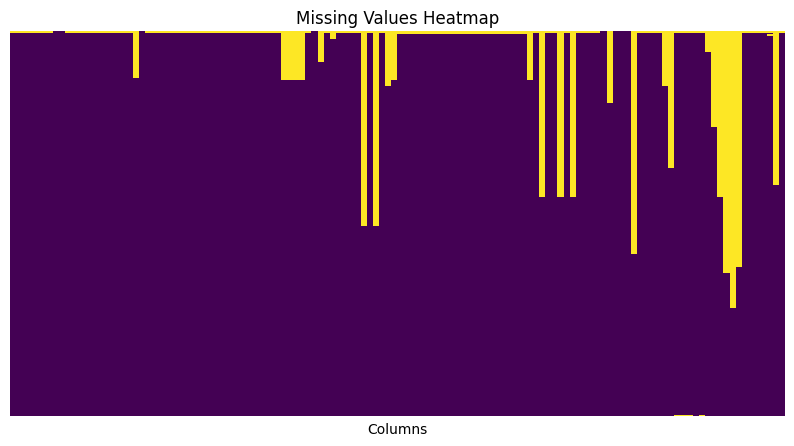

In [300]:
# heatmap
plt.figure(figsize=(10, 5))
sns.heatmap(quar_df_filter.isna(), cmap="viridis", cbar=False, yticklabels=False,xticklabels=False)
plt.xlabel("Columns")
plt.title("Missing Values Heatmap")
plt.show()

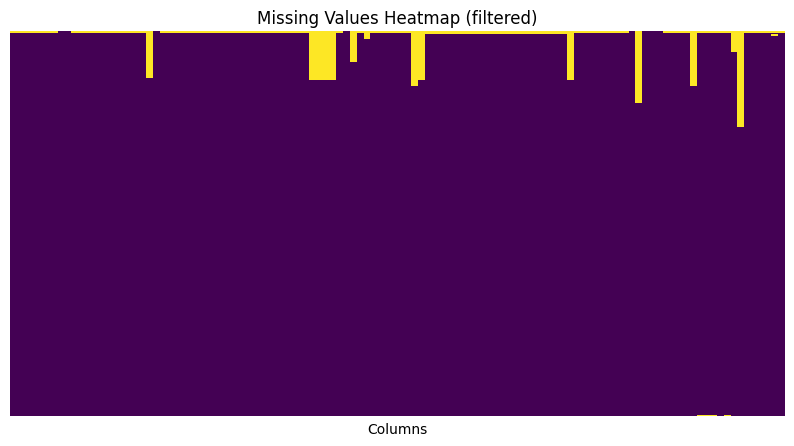

In [301]:
# filter out variables with less than 75% complete data
non_missing_ratio = quar_df_filter.notnull().mean()
threshold = 0.75  # minimum ratio of data present
valid_columns = non_missing_ratio[non_missing_ratio >= threshold].index
quar_df_filter_filtered_vars = quar_df_filter[valid_columns]

plt.figure(figsize=(10, 5))
sns.heatmap(quar_df_filter_filtered_vars.isna(), cmap="viridis", cbar=False, yticklabels=False,xticklabels=False)
plt.xlabel("Columns")
plt.title("Missing Values Heatmap (filtered)")
plt.show()



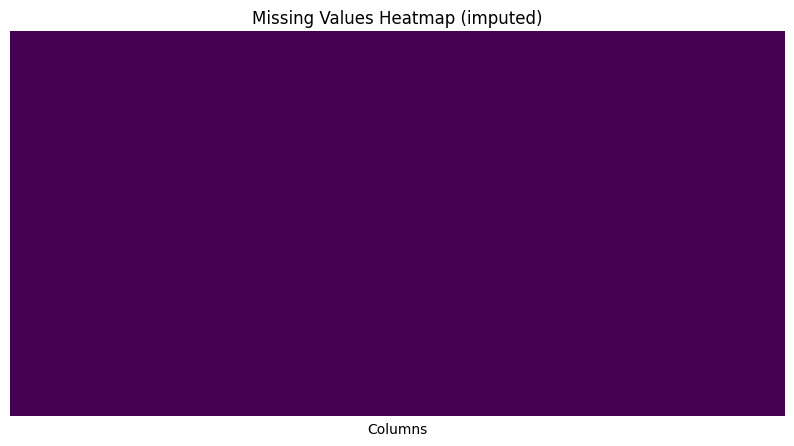

In [302]:
# impute missing values using forward then backward fill
quar_final = quar_df_filter_filtered_vars.fillna(method='ffill').fillna(method='bfill')

plt.figure(figsize=(10, 5))
sns.heatmap(quar_final.isna(), cmap="viridis", cbar=False, yticklabels=False,xticklabels=False)
plt.xlabel("Columns")
plt.title("Missing Values Heatmap (imputed)")
plt.show()


In [303]:
quar_final.head()

,GDPC1,PCDGX,PCESVX,PCNDX,Y033RC1Q027SBEAX,PNFIX,PRFIX,A014RE1Q156NBEA,A823RL1Q225SBEA,FGRECPTX,...,HNOREMQ027SX,TFAABSHNOX,VIXCLSX,USSTHPI,EXSZUSX,EXJPUSX,EXUSUKX,EXCAUSX,UMCSENTX,S&P 500
1959Q1,0.022284,0.036947,0.014833,0.008241,0.029499,0.028365,0.034310,0.8,-7.7,0.040303,...,0.015609,0.009974,17.8889,0.000132,0.000672,0.000000,0.001778,-0.009004,95.3,0.035218
1959Q2,0.022284,0.036947,0.014833,0.008241,0.029499,0.028365,0.034310,1.4,7.6,0.040303,...,0.015609,0.009974,17.8889,0.000132,0.000672,0.000000,0.001778,-0.009004,95.3,0.035218
1959Q3,0.000697,0.019149,0.013498,0.003807,0.032060,0.026577,-0.018856,0.1,5.5,-0.024853,...,0.011967,-0.000909,17.8889,0.000132,-0.000602,0.000240,-0.002205,-0.007723,95.3,0.021049
1959Q4,0.002846,-0.048953,0.012061,0.006135,-0.002028,-0.002811,-0.028690,0.8,-3.9,0.003149,...,0.009574,0.015394,17.8889,0.000132,0.004161,0.000840,-0.002067,-0.004936,93.8,-0.016597
1960Q1,0.022237,0.031655,0.008993,0.002522,0.034184,0.034161,0.030303,2.1,-14.2,0.087530,...,0.021491,-0.006638,17.8889,0.000132,-0.000138,0.000841,0.000178,0.002314,100.0,-0.026073


#### Feature Selection

In [310]:
# check that impt variables are still in the dataset 
best = ["LNS14000025", "DMANEMP", "LNS13023621", "USTPU", "IPBUSEQ"]

for i in best:
    print(i in quar_final)

True
True
True
True
True


As mentioned in the report, we identified 5 features that we found were the most significant, and isolate them before building a correlation matrix to choose the rest of the variables 

In [311]:
# remove impt from df before building correlation mat
impt_df =  pd.concat([quar_final.pop(x) for x in best], axis = 1)
impt_df.head()

,LNS14000025,DMANEMP,LNS13023621,USTPU,IPBUSEQ
1959Q1,-0.9333,0.033417,0.062044,0.010998,0.066620
1959Q2,-0.9333,0.033417,0.062044,0.010998,0.066620
1959Q3,0.2667,-0.017681,0.062044,0.004560,0.019652
1959Q4,0.3333,-0.001893,0.062044,0.003149,-0.021535
1960Q1,-0.4333,0.037699,0.062044,0.008010,0.045850


In [312]:
quar_final.head()

,GDPC1,PCESVX,PCNDX,Y033RC1Q027SBEAX,PNFIX,PRFIX,A014RE1Q156NBEA,A823RL1Q225SBEA,FGRECPTX,SLCEX,...,HNOREMQ027SX,TFAABSHNOX,VIXCLSX,USSTHPI,EXSZUSX,EXJPUSX,EXUSUKX,EXCAUSX,UMCSENTX,S&P 500
1959Q1,0.022284,0.014833,0.008241,0.029499,0.028365,0.034310,0.8,-7.7,0.040303,0.002214,...,0.015609,0.009974,17.8889,0.000132,0.000672,0.000000,0.001778,-0.009004,95.3,0.035218
1959Q2,0.022284,0.014833,0.008241,0.029499,0.028365,0.034310,1.4,7.6,0.040303,0.002214,...,0.015609,0.009974,17.8889,0.000132,0.000672,0.000000,0.001778,-0.009004,95.3,0.035218
1959Q3,0.000697,0.013498,0.003807,0.032060,0.026577,-0.018856,0.1,5.5,-0.024853,0.000585,...,0.011967,-0.000909,17.8889,0.000132,-0.000602,0.000240,-0.002205,-0.007723,95.3,0.021049
1959Q4,0.002846,0.012061,0.006135,-0.002028,-0.002811,-0.028690,0.8,-3.9,0.003149,-0.005256,...,0.009574,0.015394,17.8889,0.000132,0.004161,0.000840,-0.002067,-0.004936,93.8,-0.016597
1960Q1,0.022237,0.008993,0.002522,0.034184,0.034161,0.030303,2.1,-14.2,0.087530,0.016744,...,0.021491,-0.006638,17.8889,0.000132,-0.000138,0.000841,0.000178,0.002314,100.0,-0.026073


In [313]:
corr_matrix = quar_final.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
to_drop = [column for column in upper.columns if any(upper[column] > 0.85)]

to_drop


['PNFIX',
 'IPB51110SQ',
 'CUMFNS',
 'USLAH',
 'USSERV',
 'USTRADE',
 'LNS14000026',
 'UEMP5TO14',
 'WPSID61',
 'RCPHBS',
 'TB3MS',
 'BAA10YM',
 'TARESAX',
 'TFAABSHNOX']

In [314]:
# drop variables specified by correlation matrix
quar_final = quar_final.drop(to_drop, axis = 1)

# add impt var back 
quar_df_total= quar_final.merge(impt_df,how= "left", left_index=True, right_index=True)
quar_df_total.head()

,GDPC1,PCESVX,PCNDX,Y033RC1Q027SBEAX,PRFIX,A014RE1Q156NBEA,A823RL1Q225SBEA,FGRECPTX,SLCEX,IMPGSC1,...,EXJPUSX,EXUSUKX,EXCAUSX,UMCSENTX,S&P 500,LNS14000025,DMANEMP,LNS13023621,USTPU,IPBUSEQ
1959Q1,0.022284,0.014833,0.008241,0.029499,0.034310,0.8,-7.7,0.040303,0.002214,0.047511,...,0.000000,0.001778,-0.009004,95.3,0.035218,-0.9333,0.033417,0.062044,0.010998,0.066620
1959Q2,0.022284,0.014833,0.008241,0.029499,0.034310,1.4,7.6,0.040303,0.002214,0.047511,...,0.000000,0.001778,-0.009004,95.3,0.035218,-0.9333,0.033417,0.062044,0.010998,0.066620
1959Q3,0.000697,0.013498,0.003807,0.032060,-0.018856,0.1,5.5,-0.024853,0.000585,0.009496,...,0.000240,-0.002205,-0.007723,95.3,0.021049,0.2667,-0.017681,0.062044,0.004560,0.019652
1959Q4,0.002846,0.012061,0.006135,-0.002028,-0.028690,0.8,-3.9,0.003149,-0.005256,-0.025718,...,0.000840,-0.002067,-0.004936,93.8,-0.016597,0.3333,-0.001893,0.062044,0.003149,-0.021535
1960Q1,0.022237,0.008993,0.002522,0.034184,0.030303,2.1,-14.2,0.087530,0.016744,0.037076,...,0.000841,0.000178,0.002314,100.0,-0.026073,-0.4333,0.037699,0.062044,0.008010,0.045850


In [315]:
#checking for NAN in join
quar_df_total.isna().sum().sum()

0

Training data and test data split

In [ ]:
train_size = int(len(quar_df_total) * 0.7) #test-split of 0.7
quar_df_train = quar_df_total[:train_size]
quar_df_test = quar_df_total[train_size:]


### Modeling

#### ARIMA

In [317]:
# find optimal ARIMA parameters
optimal_model = auto_arima(quar_df_train['GDPC1'],
                         start_p=0, start_q=0, max_p=5, max_q=5,
                         seasonal=False,
                         d=None, max_d=2,
                         trace=True,
                         error_action='ignore',
                         suppress_warnings=True,
                         stepwise=True)

print(f"Optimal ARIMA parameters: {optimal_model.order}")


Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-1100.191, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=-1187.887, Time=0.05 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=-1144.598, Time=0.06 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=-1211.092, Time=0.04 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=-1210.619, Time=0.19 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=-1211.917, Time=0.17 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=-1216.312, Time=0.06 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=-1211.911, Time=0.24 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=-1175.570, Time=0.20 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=-1217.110, Time=0.36 sec
 ARIMA(3,0,2)(0,0,0)[0]             : AIC=-1215.634, Time=0.34 sec
 ARIMA(2,0,3)(0,0,0)[0]             : AIC=-1215.690, Time=0.08 sec
 ARIMA(1,0,3)(0,0,0)[0]             : AIC=-1215.800, Time=0.08 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=-1208.105, Time=0.07 sec
 ARIMA(3,0,3)(0,0,0

In [318]:
# fit model
arima_model = ARIMA(quar_df_train['GDPC1'], order=optimal_model.order)
arima_results = arima_model.fit()


c:\Users\tanke\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\tanke\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\tanke\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


#### VAR

In [ ]:
#fit the vector autoregression model
var_model = VAR(quar_df_train)
var_results = var_model.fit()

### Evaluation

#### Model Evaluation

In [ ]:
# to calculate whether GDP moves in the same direction as that in the actual data
def calculate_directional_accuracy(actual, predicted):
    actual_direction = np.sign(np.diff(actual))
    predicted_direction = np.sign(np.diff(predicted))
    
    correct_directions = np.sum(actual_direction == predicted_direction)
    total_directions = len(actual_direction)
    accuracy = correct_directions / total_directions
    
    metrics = {
        'accuracy': accuracy,
        'correct_predictions': correct_directions,
        'total_predictions': total_directions
    }
    
    return metrics


##### Model Evaluation of ARIMA

In [ ]:
# seeing whether the change in GDP as predicted by ARIMA is the same as that in the test data
arima_forecast = arima_results.forecast(len(quar_df_test))
arima_accuracy = calculate_directional_accuracy(quar_df_test['GDPC1'], arima_forecast)
print("\nARIMA Directional Accuracy:", arima_accuracy)



ARIMA Directional Accuracy: {'accuracy': 0.3974358974358974, 'correct_predictions': 31, 'total_predictions': 78}


##### Model Evaluation of VAR

In [ ]:
# seeing whether the change in GDP as predicted by VAR is the same as that in the test data
var_forecast = var_results.forecast(steps=len(quar_df_test), y = quar_df_train.values)
var_gdp_forecast = var_forecast[:, quar_df_total.columns.get_loc('GDPC1')]
var_accuracy = calculate_directional_accuracy(quar_df_test['GDPC1'], var_gdp_forecast)
print("\nVAR Directional Accuracy:", var_accuracy)



VAR Directional Accuracy: {'accuracy': 0.5, 'correct_predictions': 39, 'total_predictions': 78}


### Fan Charts

In [ ]:
n_forecasts = 5 # 2024 Q4 to 2025 Q4
n_simulations = 1000 
intervals = [0.50, 0.65, 0.80]


In [433]:
def generate_fan_chart(forecasts, intervals, title, arima=False):
    """Generate fan chart with multiple confidence intervals"""
    plt.figure(figsize=(12, 6))
    plt.plot(forecasts.mean(axis=1), color='blue', label='Mean Forecast')
    
    colors = ['lightblue', 'skyblue', 'cornflowerblue']
    for interval, color in zip(intervals, colors):
        lower = np.percentile(forecasts, (100 - interval * 100) / 2, axis=1)
        upper = np.percentile(forecasts, 100 - (100 - interval * 100) / 2, axis=1)
        plt.fill_between(range(len(forecasts)), lower, upper, color=color, alpha=0.3,
                        label=f'{interval*100}% CI')

    quarters = ["2024Q4", '2025Q1', '2025Q2', '2025Q3', '2025Q4']

    
    plt.xticks(ticks=range(len(quarters)), labels=quarters)
    plt.yticks([])

    plt.title(title)
    plt.legend()
    plt.grid(True)
    if arima==True:
        plt.ylim((0.005, 0.01))

    return plt


#### ARIMA Fan Chart

In [ ]:
#optimal_model.order contains (p, d, q) which are the parameters for AR, differencing, and MA components
#obtained from the model with the lowest AIC
arima_model = ARIMA(quar_df_total['GDPC1'], order=optimal_model.order)
arima_results = arima_model.fit()



In [ ]:
arima_forecasts = np.zeros((n_forecasts, n_simulations)) # simulating the next 5 quarters
for i in range(n_simulations):
    arima_forecasts[:, i] = arima_results.simulate(n_forecasts) # appending each result to arima_forecasts
